In [1]:
%matplotlib inline
import chgpath
from bayes import *
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
class Euro(Pmf):
    """class reprsenting Euro coin"""
    
    def like(self, data, hypo):
        """likelihood of Euro producing H/T"""
        if data == 'H':
            return hypo / 100.0
        else:
            return 1 - hypo / 100.0
        

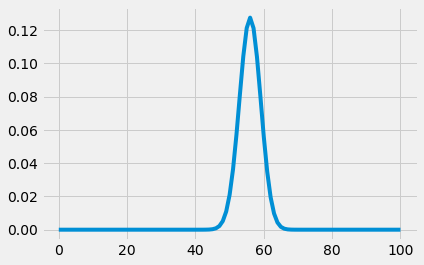

In [4]:
# initialize Euro and update with data
euro = Euro(get_init_pmf(range(0,101)))
euro.update_set(*('T' * 110 + 'H' * 140))
euro.plot()

In [5]:
# Euro posterior data
print('max likelihood:',euro.max_likelihood())
print('mean:',euro.pmf_mean())
print('median:',euro.percentile(50))
print('credible interval',euro.credible_interval())
print('prob of x==50%:',euro.prob(50))

max likelihood: 56
mean: 55.952380952380956
median: 56
credible interval (51, 61)
prob of x==50%: 0.02097652612954466


# Swamping the Priors

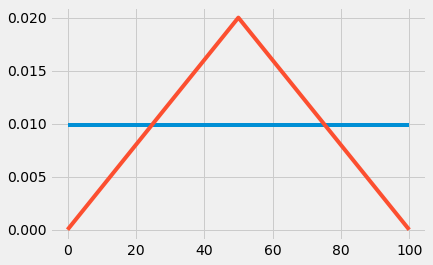

In [6]:
# uniform prior Euro
euro = Euro(get_init_pmf(range(0,101)))
euro.plot()

# triangular prior Euro
tri_euro = Euro([x for x in range(0,51)]+[100-x for x in range(51,101)])
tri_euro.normalize()
tri_euro.plot()

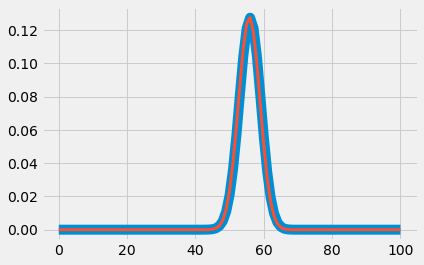

In [7]:
# uniform prior Euro update
euro.update_set(*('T' * 110 + 'H' * 140))

# triangular prior Euro update
tri_euro.update_set(*('T' * 110 + 'H' * 140))

# no large difference occurs, even with very
# different priors
euro.plot(linewidth=10.0)
tri_euro.plot(linewidth=3.0)

In [8]:
# uniform prior updated posterior info
print('Uniform Prior:')
print('max likelihood:',euro.max_likelihood())
print('mean:',euro.pmf_mean())
print('median:',euro.percentile(50))
print('credible interval',euro.credible_interval())
print('prob of x==50%:',euro.prob(50))

# triangular prior updated posterior info
print('\nTriangular Prior:')
print('max likelihood:',tri_euro.max_likelihood())
print('mean:',tri_euro.pmf_mean())
print('median:',tri_euro.percentile(50))
print('credible interval',tri_euro.credible_interval())
print('prob of x==50%:',tri_euro.prob(50))

Uniform Prior:
max likelihood: 56
mean: 55.952380952380956
median: 56
credible interval (51, 61)
prob of x==50%: 0.02097652612954466

Triangular Prior:
max likelihood: 56
mean: 55.74349943859505
median: 56
credible interval (51, 61)
prob of x==50%: 0.023847537214693633


In [9]:
class ImprovedEuro(Pmf):
    """class improving the runtime of the Euro
    
    All functionality is effectively the same;
    the runtime is greatly reduced for updates.
    """
    
    def like(self, data, hypo):
        """likelihood function for improved Euro"""
        x = hypo / 100.0
        heads, tails = data
        return x**heads * (1-x)**tails
    

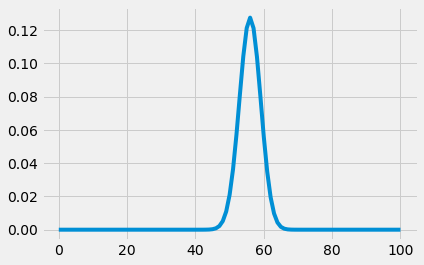

In [10]:
# demonstrating the same result is obtained
improved_euro = ImprovedEuro(get_init_pmf(range(0,101)))
improved_euro.update((140,110))
improved_euro.plot()

beta euro mean: 0.56
beta euro PMF mean: 0.5600000000000002


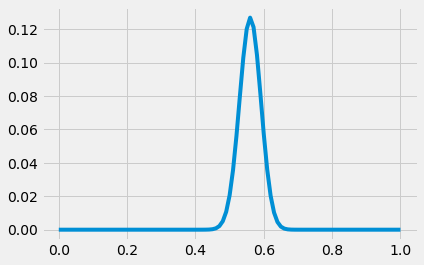

In [11]:
# representing the Euro with a Beta Distribution
# which further increases the runtime and simplicity
beta_euro = Beta()
beta_euro.update((140,110))
beta_euro_pdf = beta_euro.to_pmf()
beta_euro_pdf.normalize()
print('beta euro mean:',beta_euro.mean())
print('beta euro PMF mean:',beta_euro_pdf.pmf_mean())
beta_euro_pdf.plot()